<a href="https://colab.research.google.com/github/sandesh-kun/Vton/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TryYours - High Resolution Virtual Try On site using HR-VITON.
---
Demo for Virtual Try On website

# 1.Setup
- First, in the **Runtime** menu -> **Change runtime type**, make sure to have ```Hardware Accelerator = GPU```
- Clone repo and install dependencies.
- **It will take few minutes to finish installation**

In [1]:
# clone repository
!git clone https://github.com/lastdefiance20/TryYours-Virtual-Try-On

# install dependencies
!pip install tensorboardX av torchgeometry flask flask-ngrok iglovikov_helper_functions cloths_segmentation albumentations
!pip install scipy==1.8.0

%cd TryYours-Virtual-Try-On
# install detectron2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Cloning into 'TryYours-Virtual-Try-On'...
remote: Enumerating objects: 1113, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1113 (delta 4), reused 11 (delta 3), pack-reused 1100
Receiving objects: 100% (1113/1113), 22.21 MiB | 35.26 MiB/s, done.
Resolving deltas: 100% (198/198), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.8/722.8 kB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 2. Download Pre-trained Models

In [2]:
!pip install --upgrade --no-cache-dir gdown

%cd HR-VITON-main
!gdown https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&export=download
!gdown https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&export=download
%cd ../

%cd Graphonomy-master
!gdown https://drive.google.com/u/0/uc?id=1eUe18HoH05p0yFUd_sN6GXdTj82aW0m9&export=download
%cd ../

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/content/TryYours-Virtual-Try-On/HR-VITON-main
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy
From (redirected): https://drive.google.com/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&confirm=t&uuid=4d1cb43c-f99b-4dbf-84e8-61a973a02190
To: /content/TryYours-Virtual-Try-On/HR-VITON-main/gen.pth
100% 402M/402M [00:04<00:00, 95.4MB/s]
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ
From (redirected): https://drive.google.com/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&confirm=t&uuid=a257f6a6-f7ec-4639-b8b6-4f11f168bbd0
To: /content/TryYours-Virtual-Try-On/HR-VITON-main/mtviton.pth
100% 190M/190M [00:02<00:00, 65.7MB/s]
/content/TryYours-Virtual-Try-On
/content/TryYours-Virtual-Try-On/Graphonomy-master
Downloading...
From (uriginal): https://drive.g

# 3. Upload Cloth Images
Either use sample images or upload other cloth images

In [12]:
import os
import shutil
from google.colab import files

# Uncomment the following block if you would like to upload your own cloth images.

input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.remove(input_dir+'/cloth_web.jpg')
os.rename(input_path, input_dir+'/cloth_web.jpg')


Saving tshirt-png-t-shirt-png-transparent-image-1600.png to tshirt-png-t-shirt-png-transparent-image-1600.png


# 4. Upload Person Images
Either use sample images or upload your images

In [24]:
# Uncomment the following block if you would like to upload your own images.

input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.remove(input_dir+'/origin_web.jpg')
os.rename(input_path, input_dir+'/origin_web.jpg')


Saving san.jpg to san.jpg


# 5. Check Images
check image uploaded successfully

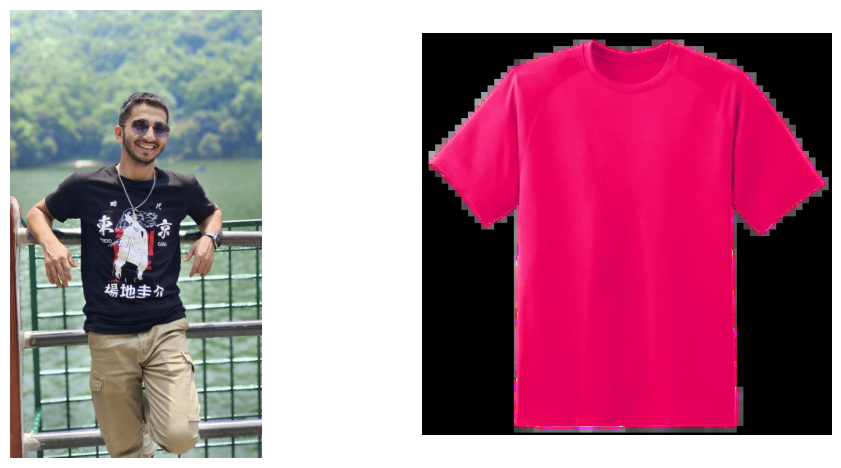

In [25]:
import matplotlib.pyplot as plt
import cv2

original = cv2.cvtColor(cv2.imread("./static/origin_web.jpg"), cv2.COLOR_BGR2RGB)
cloth = cv2.cvtColor(cv2.imread("./static/cloth_web.jpg"), cv2.COLOR_BGR2RGB)
## Display Images
fig, axes = plt.subplots(nrows=1, ncols=2)
dpi = fig.get_dpi()
fig.set_size_inches(900/ dpi, 448 / dpi)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
axes[0].axis('off')
axes[0].imshow(original)
axes[1].axis('off')
axes[1].imshow(cloth)
plt.show()

# 6. RUN CODE
* It will take less than 2 minute
* you can remove background using --background False




In [26]:
!python main.py #--background False

Get mask of cloth

Traceback (most recent call last):
  File "/content/TryYours-Virtual-Try-On/get_cloth_mask.py", line 39, in <module>
    img[int((1024-shape[0])/2): 1024-int((1024-shape[0])/2),int((768-shape[1])/2):768-int((768-shape[1])/2)]=b
ValueError: could not broadcast input array from shape (589,600,3) into shape (590,600,3)
Get openpose coordinate using posenet

Generate semantic segmentation using Graphonomy-Master library

Constructing DeepLabv3+ model...
Number of classes: 20
Output stride: 16
Number of Input Channels: 3
load model: ./inference.pth
time used for the multi-scale image inference is :2.8129987030001757

Generate Densepose image using detectron2 library

[08/13 12:26:56 apply_net]: Loading config from detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml
[08/13 12:26:56 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[08/13 12:26:58 apply_net]: Loading data f

# 7. View Results

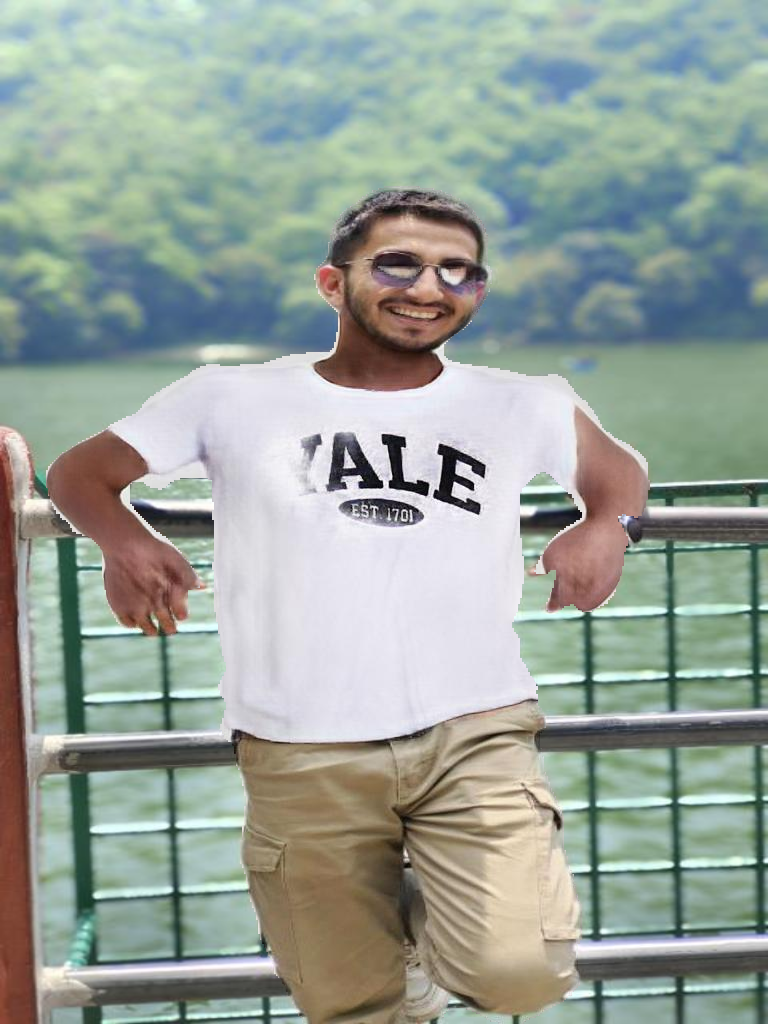

In [27]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename="./static/finalimg.png")
display(image1)

In [16]:
!pip install tensorboardX av torchgeometry flask flask-ngrok iglovikov_helper_functions cloths_segmentation albumentations

In [17]:
!pip install pyngrok==4.1.1

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15964 sha256=1969ecea7162019b14773a8eb61219b783407fdd045209a23db89c0f22b76578
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok


In [18]:
!ngrok authtoken 2Tvdl3ekBM6w2sFIx5A4zxX4PFB_3tFpJhMzH7EY3xk4unHtQ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


# We will add Website code later. Enjoy the code!